<a href="https://colab.research.google.com/github/giginar/Machinelearning/blob/main/yigit_kucukcinar_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Linear Regression Project

An Ecommerce company based in New York City that sells clothing online requires your help. 

The store has an in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 

Just follow the steps below to analyze the customer data 

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
sns.set()

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [27]:
df = pd.read_csv("Ecommerce_Customers.csv")

**Check the head of customers, and check out its info() and describe() methods.**

In [28]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [29]:
df.info()
print("-----------------")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
-----------------


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

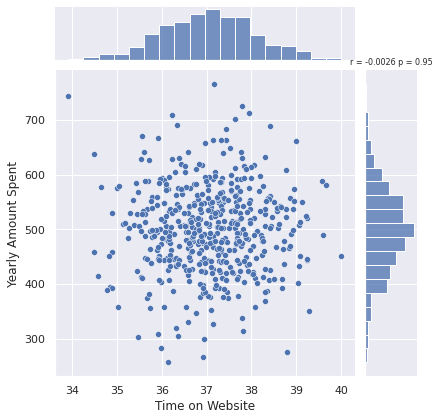

In [56]:
myPlot = sns.jointplot(x='Time on Website', y='Yearly Amount Spent',data=df)
r, p = stats.pearsonr(df["Time on Website"],df["Yearly Amount Spent"])
r = "{:.4f}".format(r)
p = "{:.2f}".format(p)
title = "r = " + str(r) + " p = " + str(p)
plt.title(title, fontsize=8, loc="center")
plt.show()

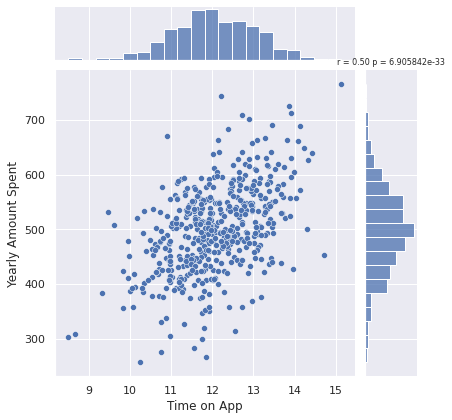

In [68]:
myPlot2 = sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)
r, p = stats.pearsonr(df["Time on App"], df["Yearly Amount Spent"])
r = "{:.2f}".format(r)
p = "{:e}".format(p)
title = "r = " + str(r) + " p = " + str(p)
plt.title(title, fontsize=8, loc="center")
plt.show()

When r i s closer to 1 or -1 that means there is a correlation. So, we can safely say that there is a positive correlation with "Time on App" and "Yearly Amount Spent", although there is not an efficient correlation between "Time on Website" and "Yearly Amount Spent"

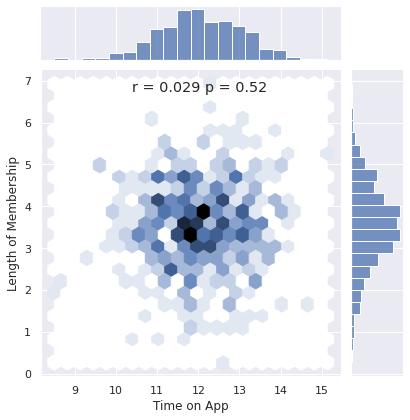

In [80]:
myPlot3 = sns.jointplot(x="Time on App",y="Length of Membership",kind="hex",data=df)
r, p = stats.pearsonr(df["Time on App"], df["Length of Membership"])
r = "{:.3f}".format(r)
p = "{:.2f}".format(p)
title = "r = " + str(r) + " p = " + str(p)
myPlot3.fig.suptitle(title,y=0.80)
plt.show()

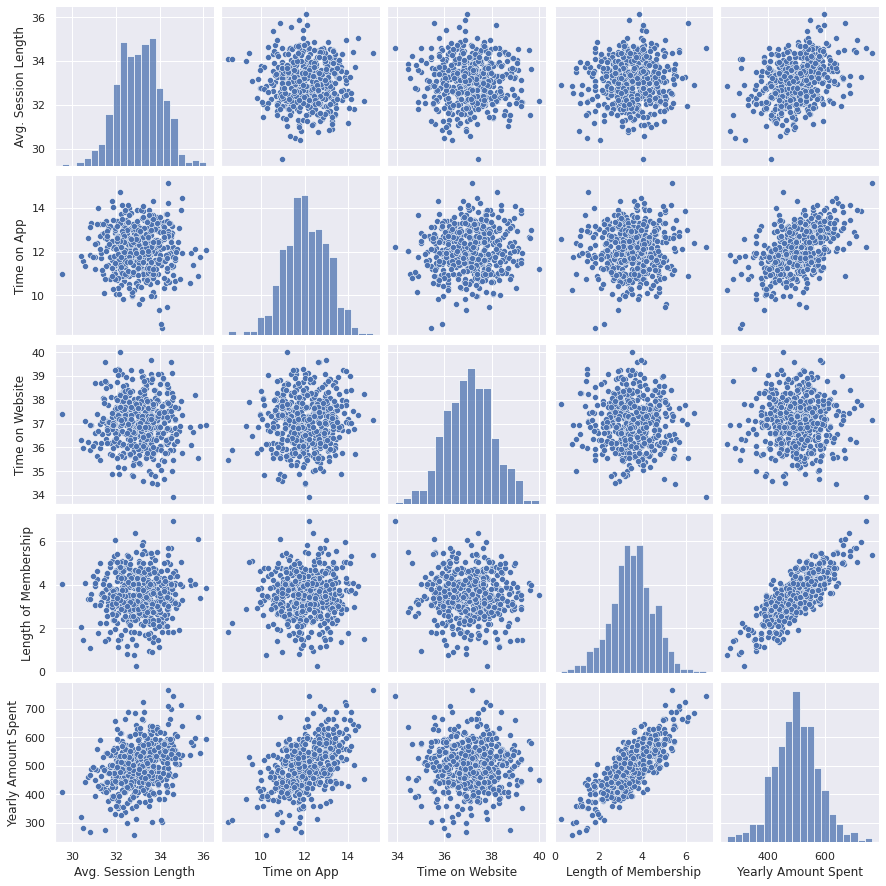

In [ ]:
sns.pairplot(df)

Based on this plot Yearly amount spent and length of membership looks like they have a strong relationship.

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

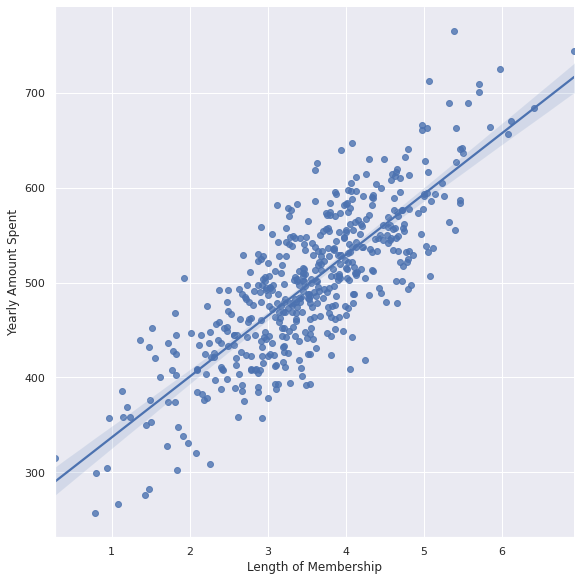

In [ ]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=df, height=8)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [82]:
df.rename(columns={'Length of Membership':"membership",'Time on App':'app','Time on Website':'website','Avg. Session Length':'session','Yearly Amount Spent':'amountSpent'},inplace=True)
df = df.drop(columns=['Address',"Email","Avatar"])
df.head()

,session,app,website,membership,amountSpent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [83]:
X = df[["session","app","website","membership"]]
y = df['amountSpent']

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [86]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [87]:
lr = LinearRegression()

** Train/fit lm on the training data.**

In [88]:
lrModel = lr.fit(X_train,y_train)

**Print out the coefficients of the model**

In [89]:
lrModel.coef_

array([25.98154972, 38.59015876,  0.19040527, 61.27909654])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [90]:
predictions = lrModel.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

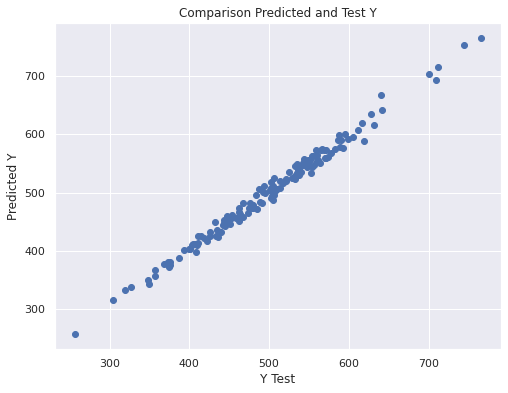

In [91]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predictions)
plt.title("Comparison Predicted and Test Y")
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [92]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [93]:
print("MAE:", mean_absolute_error(y_test,predictions))
print("MSE:", mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(mean_squared_error(y_test,predictions)))

MAE: 7.228148667775296
MSE: 79.81305181284625
RMSE: 8.933815076038135


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


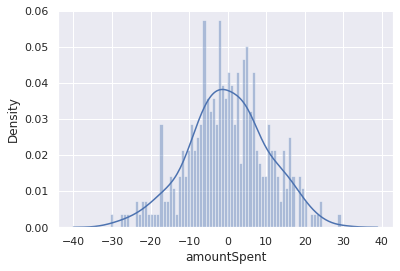

In [95]:
trainPreds = lrModel.predict(X_train)
sns.distplot(y_train-trainPreds,bins=75)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [96]:
pdCoef = pd.DataFrame(lr.coef_,index=X_train.columns,columns=['coef'])
pdCoef

,coef
session,25.981550
app,38.590159
website,0.190405
membership,61.279097


** How can you interpret these coefficients? **

Y = 25.98 * Session + 38.59 * App + 0.19 * Website + 61.28 * Membership
This our formula with the coefficients we get. 
Length of Membership is the most important factor for our "yearly spent" variable. "Time on Website" is not an effective sales factor compared to others.

**Do you think the company should focus more on their mobile app or on their website?**

Mobile app is 200 times more effective than website, so the company should focus on mobile app at once.